In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from jsonschema.exceptions import relevance

palette = sns.color_palette(["#2176AB", "#F97662", "#FFBF00", "#50C878", "#B284BE"])
sns.set_palette(palette)

llm_res = pd.read_csv('../gym/results/llm_response.csv')
altair_res = pd.read_csv('../gym/results/altair_response.csv')

In [31]:
#data visualization for altair results

#per threshold number of queries
altair_res['threshold'] = altair_res['threshold']
count = altair_res.groupby('threshold').count()


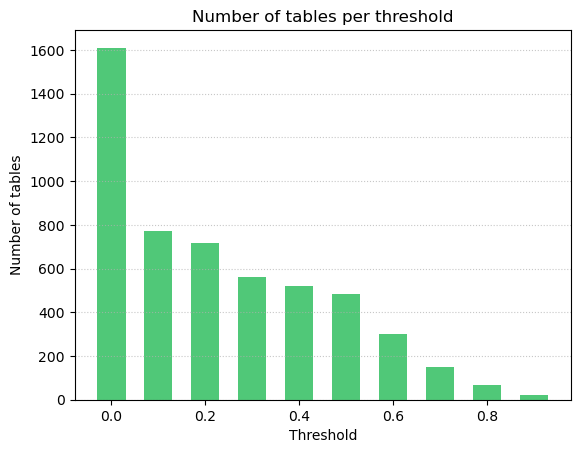

In [32]:
# Convert to bar plot and add grid for horizontal lines
plt.bar(x=count.index, height=count['query'], color=palette[3], width=0.06)
plt.xlabel('Threshold')
plt.ylabel('Number of tables')
plt.title('Number of tables per threshold')
plt.grid(axis='y', linestyle=':', alpha=0.7)
plt.show()

/tmp/ipykernel_1005008/1177175685.py:5: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.boxplot(data=query_model_scores, palette=palette)


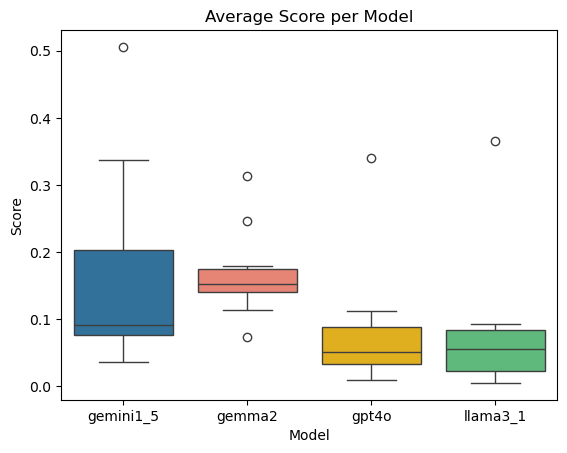

In [33]:
# Calculate the mean score for each query and model combination
query_model_scores = llm_res.groupby(['query_id', 'model'])['score'].mean().unstack()

# Plot the box plot
sns.boxplot(data=query_model_scores, palette=palette)
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Average Score per Model')
plt.show()

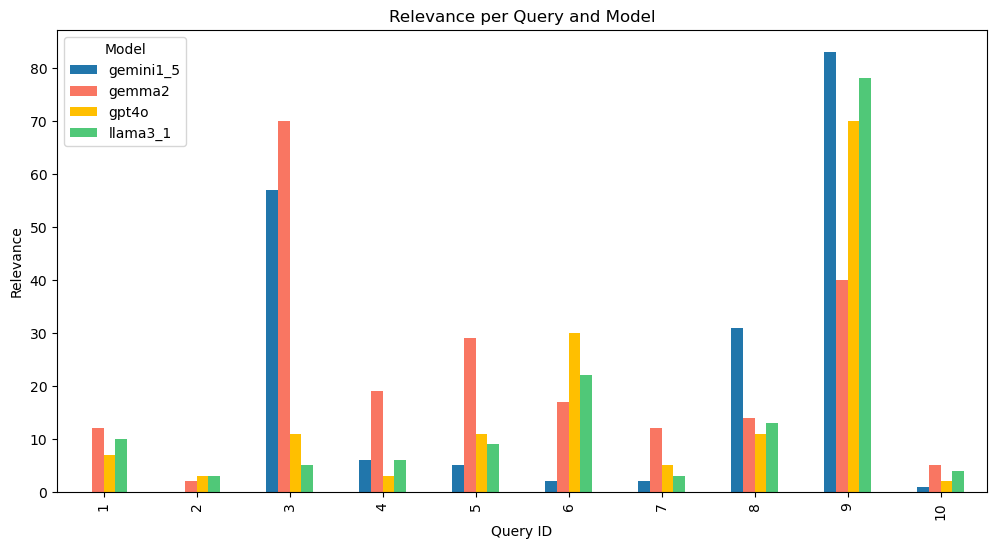

In [34]:
# when model find relevance in the query [relevant == True]
query_model_relevance = llm_res.groupby(['query_id', 'model'])['relevant'].sum().unstack()

# Plot the bar plot
query_model_relevance.plot(kind='bar', figsize=(12, 6), color=palette)
plt.xlabel('Query ID')
plt.ylabel('Relevance')
plt.title('Relevance per Query and Model')
plt.legend(title='Model')
plt.show()
